In [1]:
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import numpy as np

In [37]:
#trying to plot the theoretical velocity vs position of meteor with non constant b
def velocity_nonconstantb(y_initial,v_initial,pair,m,H):
    '''yinitial is the height in kilometers, v is the velocity in kilometers per second
    for the sign conventions we want b positive, v positive, and c0 positive'''
    ytheorylist = []
    vtheorylist = []
    y = y_initial
    v = v_initial
    b0 = (1.21*pair)/(m**(1.3)*100)
    while y < 120000:
        c1 = math.log(v/(math.e**(-b0*H*math.e**(-y/H))))
        y = y + 500
        v = math.e**(-b0*H*math.e**(-y/H) + c1)
        assert v > 0
        ytheorylist.append(y)
        vtheorylist.append(v)       
    return [ytheorylist,vtheorylist]

120000
[16769.68321134434, 27422.024256806966, 43778.21038611322, 68313.78377046477, 104311.87390378094, 156024.88927084944, 228836.8649349039, 329416.9812353511, 465853.6435750457, 647758.1220359956, 886327.2009488792, 1194355.6061024014, 1586191.0950627124, 2077627.8661240882, 2685737.1514632013, 3428637.2583090197, 4325208.644966885, 5394762.618595915, 6656674.709787356, 8129995.561849857, 9833053.181642285, 11783060.611470407, 13995742.536852036, 16484993.132651085, 19262575.69745574, 22337872.483023293, 25717690.750154093, 29406128.62786416, 33404501.957541663, 37711331.083994284, 42322384.600407034, 47230775.42561777, 52427103.323940456, 57899637.07948214, 63634528.997146405, 69616054.19353215, 75826867.22313388, 82248268.91174597, 88860476.78941818, 95642893.17933144, 102574365.75868066, 109633436.21967034, 116798573.48533595, 124048388.74468835, 131361830.33981048, 138718357.24542975, 146098090.51641127, 153481942.6329975, 160851725.14424774, 168190235.39746067, 175481323.44860

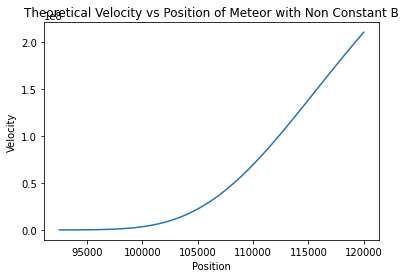

In [39]:
ytheorylist,vtheorylist=velocity_nonconstantb(92000,10000,1.73*(10**-9),1*(10**-9),10000)
plt.plot(ytheorylist,vtheorylist)
plt.title("Theoretical Velocity vs Position of Meteor with Non Constant B")
plt.xlabel("Position")
plt.ylabel("Velocity")
print(ytheorylist[-1])
print(vtheorylist)

In [27]:
#graphing the actual position and velocity of meteor 
def simulation_of_meteor(y0,v0,pair,m,H):
    '''velocity and position of meteor over time given starting velocity with non constand b'''
    t0 = 0
    t = t0
    tlist = []
    y = y0
    v = v0
    ylist = []
    vlist = []
    b0 = (1.21*pair)/(m**(1.3)*100)
    while t < 3:
        b = b0 * math.e **(-y/H)
        dt = 0.01
        t = t + dt
        tlist.append(t)
        dy = (-v) * dt 
        y = y + dy
        ylist.append(y)
        dv = -b * (v ** 2) * dt
        v = v + dv
        vlist.append(v)
    return(tlist,ylist,vlist)

Text(0, 0.5, 'Velocity')

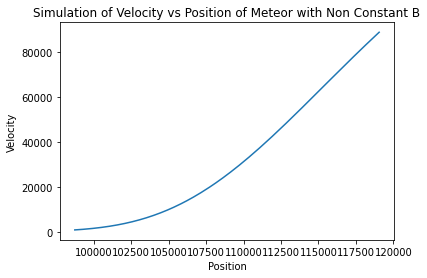

In [28]:
tlist,ylist,vlist=simulation_of_meteor(120000,94619,1.73*(10**-9),1*(10**-9),10000)
plt.plot(ylist,vlist)
plt.title("Simulation of Velocity vs Position of Meteor with Non Constant B")
plt.xlabel("Position")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity in Meters per Second')

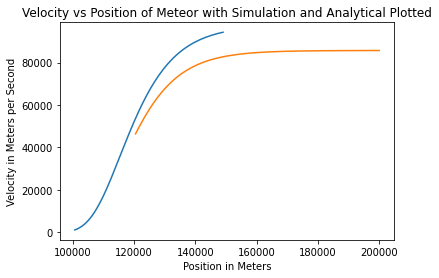

In [20]:
#plotting the two together, to compare the analytical solution with the simulation
plt.plot(ylist,vlist)
plt.plot(ytheorylist,vtheorylist)
plt.title("Velocity vs Position of Meteor with Simulation and Analytical Plotted")
plt.xlabel("Position in Meters")
plt.ylabel("Velocity in Meters per Second")

Text(0, 0.5, 'Altitude')

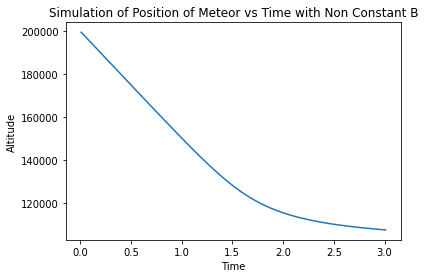

In [9]:
tlist,ylist,vlist=simulation_of_meteor(200000,50000,12.1,10000)
plt.plot(tlist[0:len(ylist)],ylist)
plt.title("Simulation of Position of Meteor vs Time with Non Constant B")
plt.xlabel("Time")
plt.ylabel("Altitude")

Text(0, 0.5, 'Velocity')

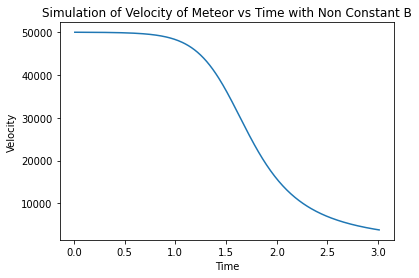

In [10]:
tlist,ylist,vlist=simulation_of_meteor(200000,50000,12.1,10000)
plt.plot(tlist[0:len(vlist)],vlist)
plt.title("Simulation of Velocity of Meteor vs Time with Non Constant B")
plt.xlabel("Time")
plt.ylabel("Velocity")